# K-Means Clustering Implementing

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans # for comparison

Make some simulated data:

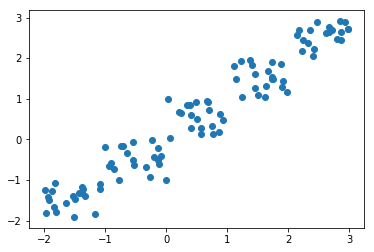

In [2]:
# Make some simple data on the unit square
def MakeUnifData(N):
    XX = np.vstack((np.random.rand(N, 2),
                    np.random.rand(N, 2) + 1,
                    np.random.rand(N, 2) - 1,
                    np.random.rand(N, 2) + 2,
                    np.random.rand(N, 2) - 2))
    return(XX)

X = MakeUnifData(20)
plt.scatter(X[:, 0], X[:, 1])

Let's implement K means, which has the following steps:

1. Pick some starting points
2. Iterate until we get no updating of cluster assignments:

    a. Assign points to nearest cluster centroid  
    b. Calculate centroids of each cluster

In [7]:
def Init(X, k):
    # initialize k-mean centers
    # random selections
    selections = np.random.choice(X.shape[0], k, replace=False)
    return X[selections, :]


def KmeansPlusPlusInit(X, k):
    # We will code this together
    # initialize k-mean centers
    if k == 1:
        selections = np.random.choice(X.shape[0], k, replace=False)
    else:
        selections = []
        selections.append(np.random.choice(X.shape[0], 1, replace=False))
        
        ## We want that the cluster centers are far appart from each other.
        ## We calculate smallest distance from the samples to the already defined centers
        ## and give those samples far appart from the centers a higher chance to be selected 
        ## as next center.
        for ii in range(1, k):
            dists_to_closest_center = []
            
            for jj in range(X.shape[0]):
                dists = [np.sum((X[jj, :] - X[cc, :]) ** 2) for cc in selections]
                min_dist = np.min(np.array(dists))
                dists_to_closest_center.append(min_dist)
                
            select_probs = np.array(dists_to_closest_center)
            select_probs /= np.sum(select_probs)
            selections.append(np.random.choice(X.shape[0], 1, p=select_probs))
            
        selections = np.array(selections).flatten()
    
    return X[selections, :]
    


def AssignClusters(X, centers):
    # Return the array assigns that contains for each sample x in X the index of the
    # center, which is closest to x
    
    n = X.shape[0]
    assigns = np.zeros((n,))
    
    k = centers.shape[0]
    for i in range(n):
        dists = np.zeros((k,))
        for j in range(k):
            dists[j] = np.sum((X[i,:] - centers[j,:])**2)
        assigns[i] = np.where(dists == np.min(dists))[0][0]
        
    return assigns


def CalculateCenters(X, cluster_assign, k):
    # Return the array centers that contains in each row i the mean of all samples
    # belonging to the ith cluster.
    m = X.shape[1]
    centers = np.zeros((k,m))
    
    for kk in range(k):
        centers[kk,:] = np.mean(X[cluster_assign == kk, :], axis = 0)
        
    return centers


def Criteria(X, cluster_assign):
    between = 0.0
    within = 0.0
    
    ## This calculates the distances of samples within a cluster and between the clusters
    ## The number returned is in [0,1]. The higher the better.
    ## But: If all sample have its one cluster, Criteria is also 1. 

    for ii in range(X.shape[0]):
        for jj in range(ii, X.shape[0]):
            ss = np.sum((X[ii, :] - X[jj, :]) ** 2)
            if cluster_assign[ii] == cluster_assign[jj]:
                within += ss
            else: 
                between += ss
                
    return between / (between + within)


def MyKmeans(X, k, plot=True, with_print=True):

    # initialize
    centers = KmeansPlusPlusInit(X, k)
    #centers = Init(X, k)

    cluster_assign = AssignClusters(X, centers)

    # iterate:
    max_iter = 10

    if plot:
        f, ax = plt.subplots(max_iter + 1)
        f.set_figheight(max_iter * 3)
        f.set_figwidth(3)
        
        ax[0].scatter(X[:, 0], X[:, 1], c=cluster_assign, s=100)
        ax[0].scatter(centers[:, 0], centers[:, 1], c='gold', s=100)

    for ii in range(max_iter):
        # assign points
        cluster_assign = AssignClusters(X, centers)
    
        # update centers
        prev_centers = centers
    
        centers = CalculateCenters(X, cluster_assign, k)
    
        # check if update is the same as the last iteration
        if with_print:
            print(ii, ':', np.sum(prev_centers == centers) == (k * 2), Criteria(X, cluster_assign))
    
        if plot:
            ax[ii+1].scatter(X[:, 0], X[:, 1], c=cluster_assign, s=100)
            ax[ii+1].scatter(centers[:, 0], centers[:, 1], c='gold', s=100)
        
    return Criteria(X, cluster_assign)


0 : False 0.9923549753193313
1 : False 0.992860817184134
2 : True 0.992860817184134
3 : True 0.992860817184134
4 : True 0.992860817184134
5 : True 0.992860817184134
6 : True 0.992860817184134
7 : True 0.992860817184134
8 : True 0.992860817184134
9 : True 0.992860817184134


0.992860817184134

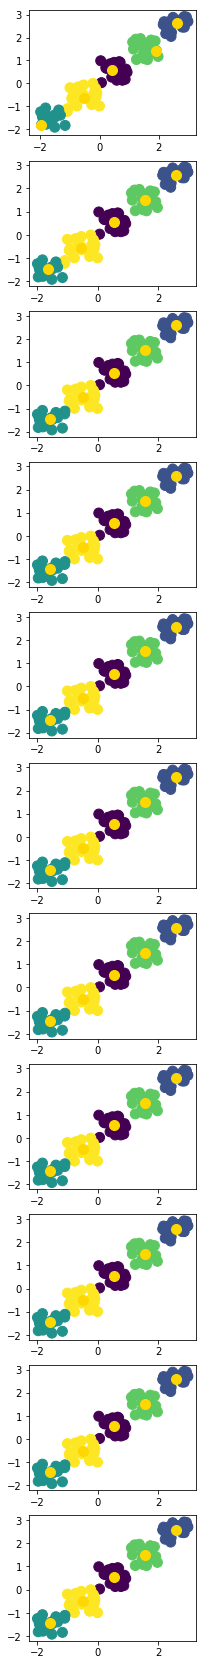

In [8]:
MyKmeans(X, 5, plot=True, with_print=True)

[0.8600357819683077, 0.9514688780629444, 0.9789117805988633, 0.992860817184134, 0.9939215798669275, 0.9948355241013364, 0.9957597461949635, 0.9968300265016301]


Text(0, 0.5, 'scores')

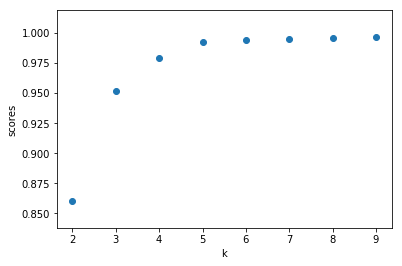

In [9]:
scores = []

for kk in range(2, 10):
    scores.append(MyKmeans(X, kk, plot=False, with_print=False))
    
print(scores)
plt.scatter(range(2, 10), scores)
plt.xlabel('k')
plt.ylabel('scores')

## We have the best amount of cluster, if the slope flattens.

[0.9774558430142799, 0.9928106949999098, 0.9928106949999098, 0.9928106949999098, 0.9928106949999098, 0.992860817184134, 0.992860817184134, 0.992860817184134, 0.992860817184134, 0.9783905498285949]


(0.95, 1.01)

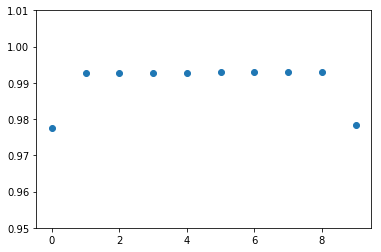

In [26]:
# check for clustering stability

criteria_list = []

for rr in range(10):
    criteria_list.append(MyKmeans(X, 5, plot=False, with_print=False))
    
print(criteria_list)

plt.scatter(range(10), criteria_list)
plt.ylim(0.95,1.01)